# <center> **Audio Classification**

<div align='center'><img src='https://production-media.paperswithcode.com/datasets/UrbanSound8K-0000003722-02faef06.jpg'></div>

***

### **AIM : Aiming to develop a Neural Network Model that can predict or classify a sound or audio that belongs to which class.**

>

#### Importing all necessary libraries

In [2]:
#https://www.kaggle.com/sachinsarkar/urban-sound-classification-usnig-librosa-and-ann/notebook
import os
import numpy as np
import pandas as pd
import librosa as lb
import IPython.display as ipd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tqdm import tqdm

2024-01-22 17:27:20.466520: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-22 17:27:20.470143: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-22 17:27:20.543258: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 17:27:22.432491: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
pwd()

'/home/gustavo/Sync/ipt/3ciclo/green_bug/sounds'

#### Importing the metadata file contains the information about the audio dataset.

In [4]:
metadata = pd.read_csv('./input/UrbanSound8K.csv')
print(metadata.shape)
metadata.head()

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [30]:
pwd

'/home/gustavo/Sync/ipt/3ciclo/green_bug/sounds'

#### Audio Classes

In [31]:
classes = metadata.groupby('classID')['class'].unique()
classes

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

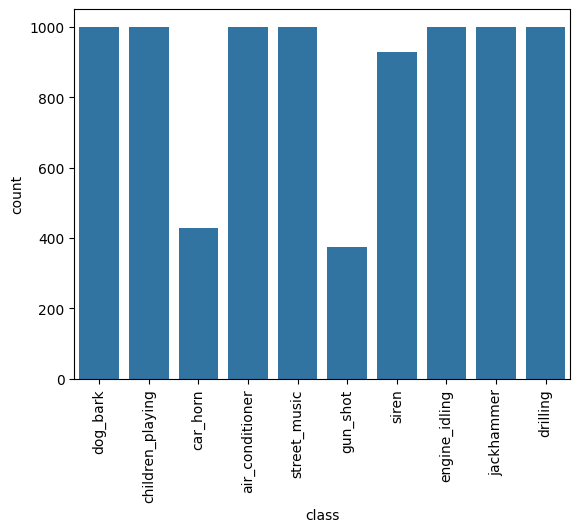

In [32]:
sns.countplot(x='class',data=metadata)
plt.xticks(rotation=90)
plt.show()

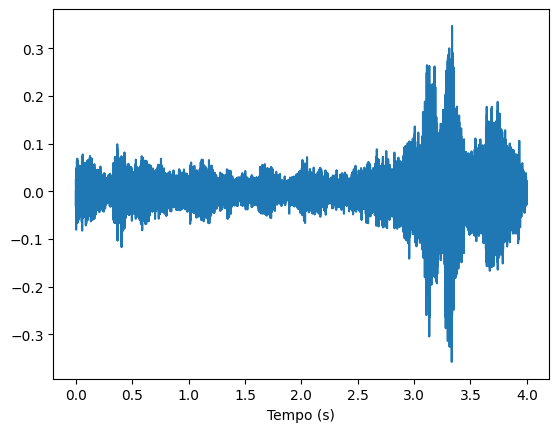

In [115]:
#Carregar um exemplo de som
def plot_sound(filename):
    librosa_audio_data, librosa_sample_rate = lb.load(filename)
    time_x = np.arange(len(librosa_audio_data)) / librosa_sample_rate
    plt.plot(time_x, librosa_audio_data)
    plt.xlabel("Tempo (s)")

filename = './input/fold5/190893-2-0-11.wav'
plot_sound(filename)

ipd.Audio(filename)

#### A function that extract and returns numeric features from audio file

In [8]:
def feature_extractor(path):
    data, simple_rate = lb.load(path)

    data = lb.feature.mfcc(y=data, n_mfcc=128)
    data = np.mean(data,axis=1)
    return data

In [6]:
audio_dataset_path='input/'

#### Extracting Features from Audio files and preparing the dataset

In [9]:
x, y = [], []
for i,rows in tqdm(metadata.iterrows()):
    path = os.path.join(audio_dataset_path, 'fold' + str(rows['fold']), str(rows['slice_file_name']))

    x.append(feature_extractor(path))
    y.append(rows['classID'])
x = np.array(x)

y_labels = np.array(y)
x.shape, y_labels.shape

0it [00:00, ?it/s]

3553it [03:07, 24.23it/s]/home/gustavo/Sync/ipt/3ciclo/green_bug/sounds/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [07:32, 18.33it/s]/home/gustavo/Sync/ipt/3ciclo/green_bug/sounds/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8328it [07:33, 20.16it/s]/home/gustavo/Sync/ipt/3ciclo/green_bug/sounds/.venv/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [08:00, 18.15it/s]


NameError: name 'y_labels' is not defined

#### One Hot Transformation

In [78]:
y = to_categorical(y_labels)
y.shape


(8732, 10)

#### Train, Test and validation Split

In [79]:
xtrainval, xtest, ytrainval, ytest = train_test_split(x,y,test_size=0.1,stratify=None,random_state=387)
xtrain, xvalid, ytrain, yvalid = train_test_split(xtrainval,ytrainval,test_size=0.2, random_state=387)

print('\nNumber of samples for Train set :',xtrain.shape[0])
print('Number of samples for Validation set :',xvalid.shape[0])
print('Number of samples for Test set :',xtest.shape[0])


Number of samples for Train set : 6286
Number of samples for Validation set : 1572
Number of samples for Test set : 874


#### Artificial Neural Network Model Building

In [80]:
model = Sequential(
                        [
                            layers.Dense(1000,activation='relu',input_shape=(128,)),
                            layers.Dense(750,activation='relu'),
                            layers.Dense(500,activation='relu'),
                            layers.Dense(250,activation='relu'),
                            layers.Dense(100,activation='relu'),
                            layers.Dense(50,activation='relu'),
                            layers.Dense(10,activation='softmax')
                        ]
                   )
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 1000)              │    129,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_22 (Dense)                │ (None, 750)               │    750,750 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_23 (Dense)                │ (None, 500)               │    375,500 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_24 (Dense)                │ (None, 250)               │    125,250 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_25 (Dense)                │ (None, 100)               │     25,100 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_26 (Dense)                │ (None, 50)                │      5,050 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_27 (Dense)                │ (None, 10)                │        510 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 1,411,160 (5.38 MB)

 Trainable params: 1,411,160 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

#### Training and Compilation of the model

In [81]:
print(xtrain.shape)
print(ytrain.shape)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
training = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),epochs=20)

(6286, 128)
(6286, 10)
Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.3219 - loss: 2.4580 - val_accuracy: 0.6285 - val_loss: 1.1895
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6583 - loss: 1.0382 - val_accuracy: 0.7347 - val_loss: 0.8389
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7661 - loss: 0.7159 - val_accuracy: 0.7793 - val_loss: 0.7128
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8329 - loss: 0.5165 - val_accuracy: 0.8174 - val_loss: 0.6066
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8757 - loss: 0.3932 - val_accuracy: 0.8168 - val_loss: 0.5551
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8793 - loss: 0.3626 - val_accuracy: 0.8238 - val_loss: 0.5716
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9021 - loss: 0.2823 - val_accuracy: 0.8842 - val_loss: 0.4358
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9258 - 

#### Training History

In [82]:
train_hist = pd.DataFrame(training.history)
train_hist

,accuracy,loss,val_accuracy,val_loss
0,0.445912,1.755337,0.628499,1.189481
1,0.694241,0.947719,0.734733,0.838928
2,0.777283,0.689449,0.779262,0.712752
3,0.838053,0.498046,0.817430,0.606590
4,0.865574,0.416745,0.816794,0.555114
5,0.877665,0.365330,0.823791,0.571552
6,0.909481,0.272936,0.884224,0.435816
7,0.924117,0.231234,0.872137,0.433255
8,0.928253,0.218586,0.894402,0.388924
9,0.939230,0.189410,0.880407,0.396018


#### Visualizing Training History

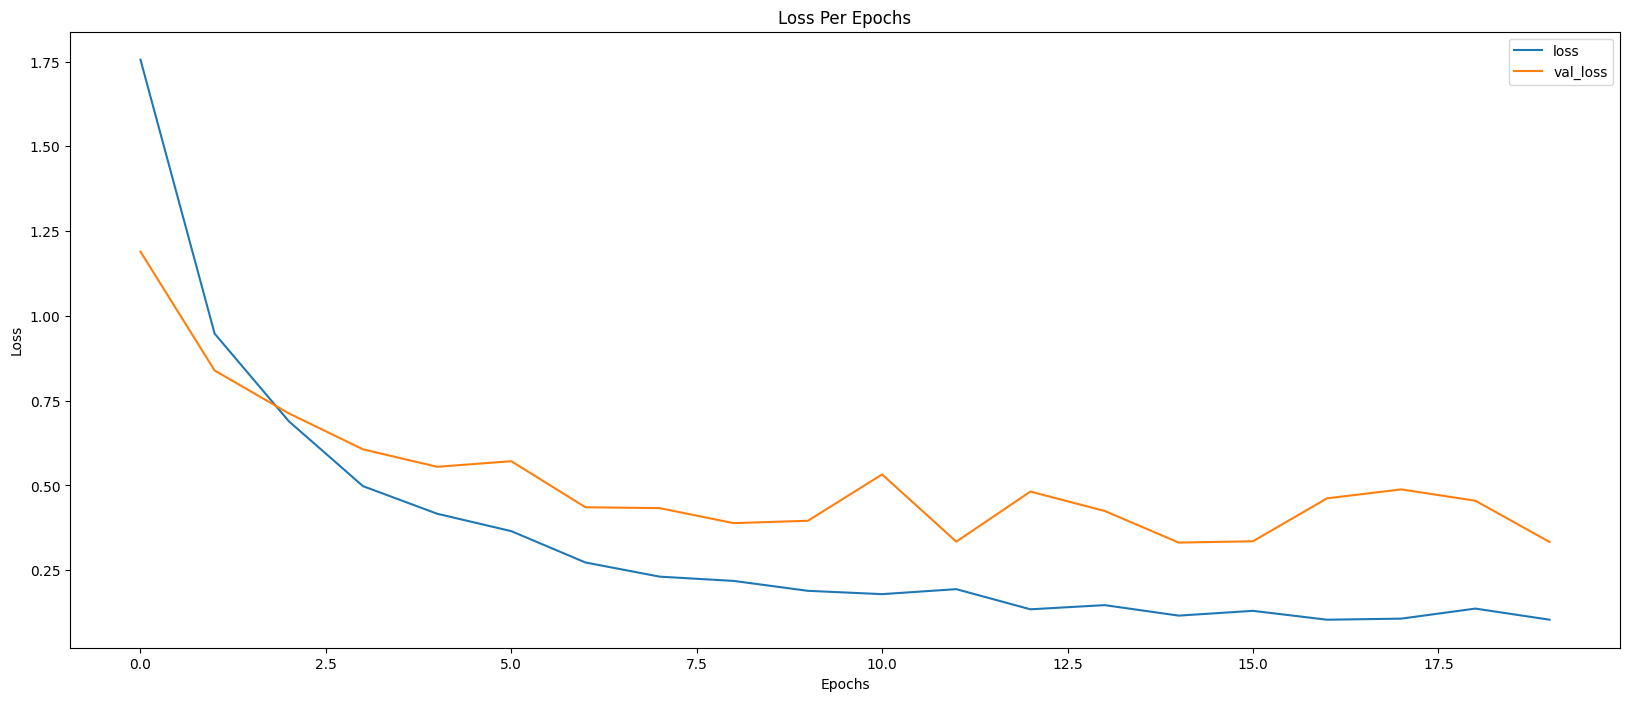

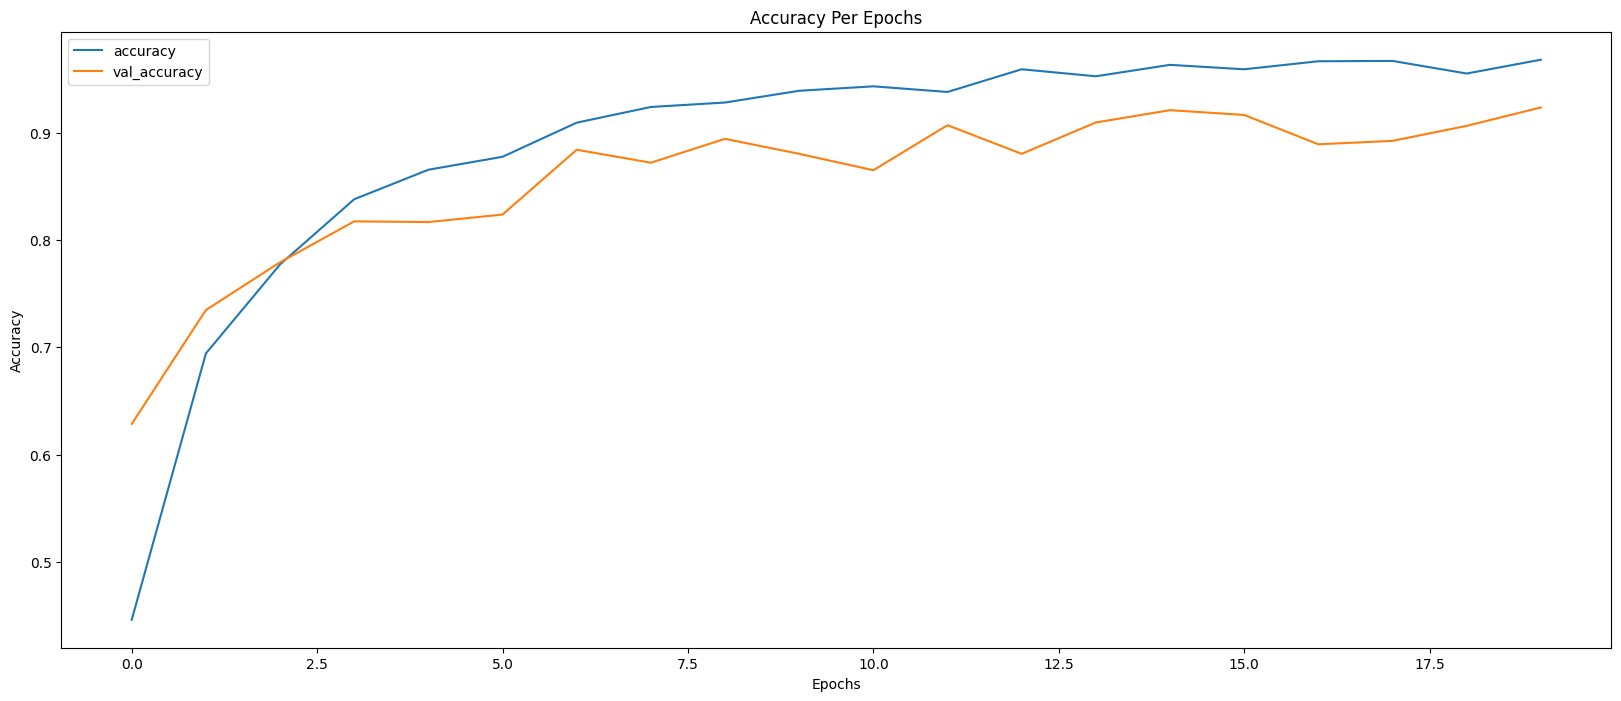

In [83]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['loss','val_loss'])
plt.title('Loss Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy Per Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

#### Model Performance Analysis on Test Data

In [116]:
ytrue = np.argmax(ytest,axis=1)
ypred = np.argmax(model.predict(xtest),axis=1)
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Classification Report : 

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       110
           1       1.00      0.87      0.93        39
           2       0.84      0.92      0.88        92
           3       0.89      0.82      0.85       109
           4       0.91      0.95      0.93        95
           5       0.95      0.96      0.95        98
           6       0.83      0.72      0.77        40
           7       0.98      0.94      0.96        93
           8       0.93      0.97      0.95        95
           9       0.92      0.94      0.93       103

    accuracy                           0.92       874
   macro avg       0.92      0.91      0.91       874
weighted avg       0.92      0.92      0.92       874



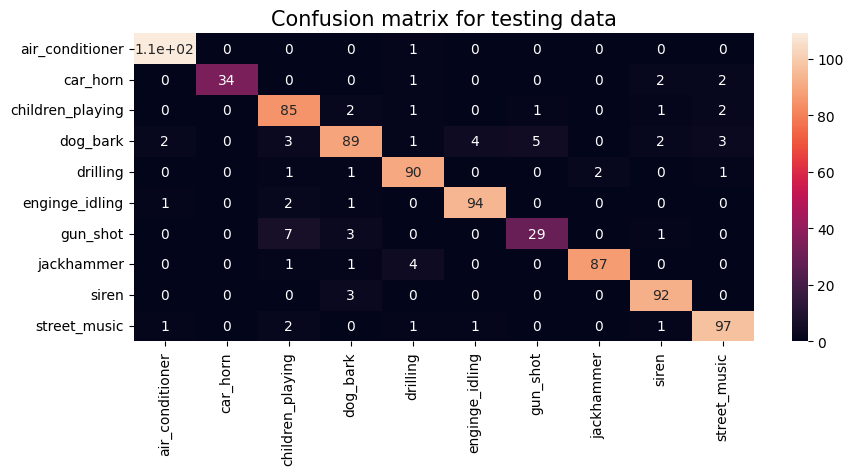

In [117]:
plt.figure(figsize=(10,4))
plt.title("Confusion matrix for testing data", fontsize = 15)
plt.xlabel("Predicted class")
plt.ylabel("True class")
sns.heatmap(confusion_matrix(ytrue,ypred),annot=True,
           xticklabels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'],
           yticklabels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'])

plt.show()

#### The final Prediction function that takes the audio path and returns the predicted class along with audio

In [85]:
def predict(path):
    audio = np.array([feature_extractor(path)])
    classid = np.argmax(model.predict(audio)[0])
    print('Class predicted :',classes[classid][0],'\n\n')
    return ipd.Audio(path)

#### Testing the Prediction Function on a Audio file

In [86]:
predict('./input/fold6/104327-2-0-26.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Class predicted : children_playing 




# <center> **Thank You**